# Validación Cruzada



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    KFold,
    train_test_split
)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Crear datos

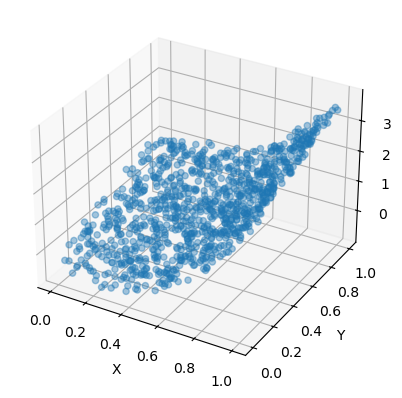

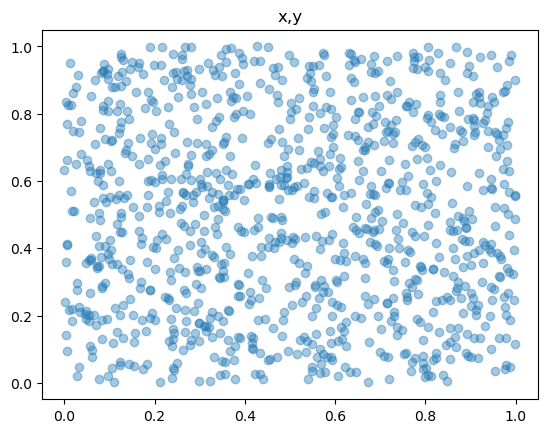

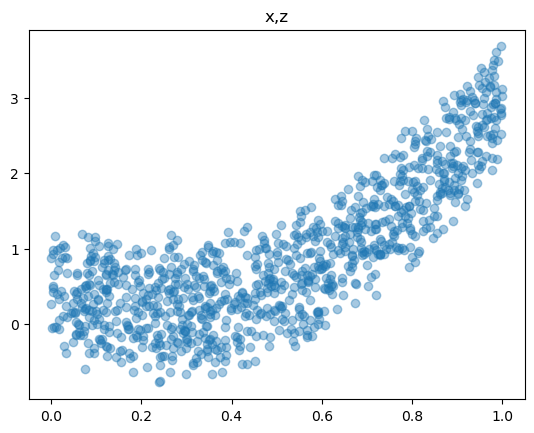

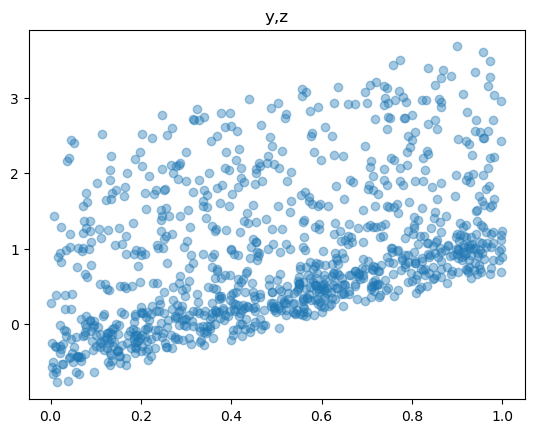

In [2]:
x = np.random.rand(1000)
y = np.random.rand(1000)
a = -5
b = 3
c = 2

def f(x,y):
  scale = 5
  offset = np.random.rand(1000)/2

  return (a*x + b*y)/c + scale * x**2 - offset

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, marker="o", alpha=0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

plt.scatter(x,y, alpha=0.4)
plt.title("x,y")
plt.show()

plt.scatter(x,z, alpha=0.4)
plt.title("x,z")
plt.show()

plt.scatter(y,z, alpha=0.4)
plt.title("y,z")
plt.show()

In [3]:
df = pd.DataFrame(data={
    "x1":x,
    "x2":y,
    "y":z
})
df.head()

,x1,x2,y
0,0.375805,0.790789,0.555955
1,0.407270,0.326886,0.294190
2,0.239483,0.108339,-0.245140
3,0.384978,0.257415,-0.033800
4,0.958906,0.739645,2.992022


## Separar datos en Train / Test

In [4]:
X = df[["x1","x2"]]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Entrenar modelo preliminar

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = reg.predict(X_test)

In [7]:
mean_absolute_error(y_test,y_pred)

0.32686861257832206

## Validación cruzada

In [8]:
kfold = KFold(
    n_splits = 5,
    shuffle=True,
    random_state = 42
)

In [10]:
iteracion = 1
errores = []
regresores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
  X_fold = X_train.loc[train_idx]
  y_fold = y_train.loc[train_idx]

  X_val = X_train.loc[val_idx]
  y_val = y_train.loc[val_idx]

  # Fit Linear regression model
  reg = LinearRegression()
  reg.fit(X_fold, y_fold)
  y_pred = reg.predict(X_val)
  mae = mean_absolute_error(y_val, y_pred)

  print(f"====== Iter {iteracion} ======")
  print(f"MAE: {mae:.3f}\n")

  iteracion += 1
  errores.append(mae)
  regresores.append(reg)
print(f"MAE promedio: {np.mean(errores):.3f}")

====== Iter 1 ======
MAE: 0.341

====== Iter 2 ======
MAE: 0.338

====== Iter 3 ======
MAE: 0.322

====== Iter 4 ======
MAE: 0.336

====== Iter 5 ======
MAE: 0.348

MAE promedio: 0.337


## Agrupar modelos

In [11]:
def regresores_predict(X_test):
  preds = np.zeros(200)
  for reg in regresores:
    y_pred = reg.predict(X_test)
    preds += y_pred

  return preds/len(regresores)

z_pred = regresores_predict(X_test)
mean_absolute_error(y_test, z_pred)

0.3268111048949525

## Resultados finales

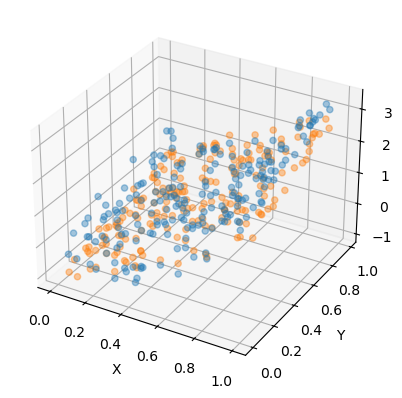

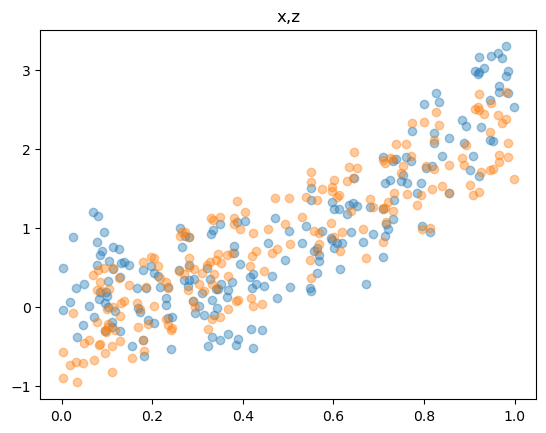

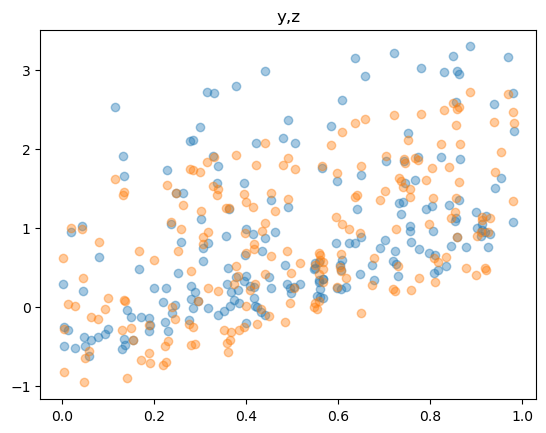

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], y_test, marker="o", alpha=0.4)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], z_pred, marker="o", alpha=0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

plt.scatter(X_test.iloc[:,0], y_test, alpha=0.4)
plt.scatter(X_test.iloc[:,0], z_pred, alpha=0.4)
plt.title("x,z")
plt.show()

plt.scatter(X_test.iloc[:,1],y_test, alpha=0.4)
plt.scatter(X_test.iloc[:,1], z_pred, alpha=0.4)
plt.title("y,z")
plt.show()